In [2]:
import pickle
import pandas as pd
import urllib.request
import matplotlib.pyplot as plt
import os
import numpy as np

data_url = "https://data.lacity.org/api/views/2nrs-mtv8/rows.csv?accessType=DOWNLOAD"

# download data
if not os.path.isfile("data.csv"):
    urllib.request.urlretrieve(data_url, "data.csv")

"""
Use the store_object function to make local caching of the data.
"""
def store_object(filename, instruction):
    # check if file was cached before and read it
    if os.path.isfile(filename):
        return pickle.load(open(filename, 'rb'))
    # run instruction and save it as pickle then return object
    else:
        obj = instruction()
        pickle.dump(obj, open(filename, 'wb'))
        return obj
    
data = store_object("data.pkl", lambda: pd.read_csv("data.csv"))
data.head(5)

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,220614831,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,1900 TRANSIENT,NaN,34.0944,-118.3277


In [12]:
data_neighborhood = pd.read_csv("data_neighborhood.csv")
data_neighborhood.head(5)

,DR_NO,neighborhood
0,190326475,Mid-City
1,200106753,Downtown
2,200320258,Exposition Park
3,200907217,Sherman Oaks
4,220614831,Hollywood


In [13]:
population = pd.read_csv("prisonpolicy_census.csv", sep=";")
population.head(5)

,neighborhood,region,number of people in prison,census population,total population,inprisonment rate per 100000,Unnamed: 6
0,Arlington Heights,Central L.A.,117,20188,20305,576,NaN
1,Beverly Grove,Central L.A.,48,26392,26440,182,NaN
2,Carthay,Central L.A.,19,5144,5163,368,NaN
3,Chinatown,Central L.A.,42,15550,15592,269,NaN
4,Downtown,Central L.A.,262,66555,66196,396,NaN


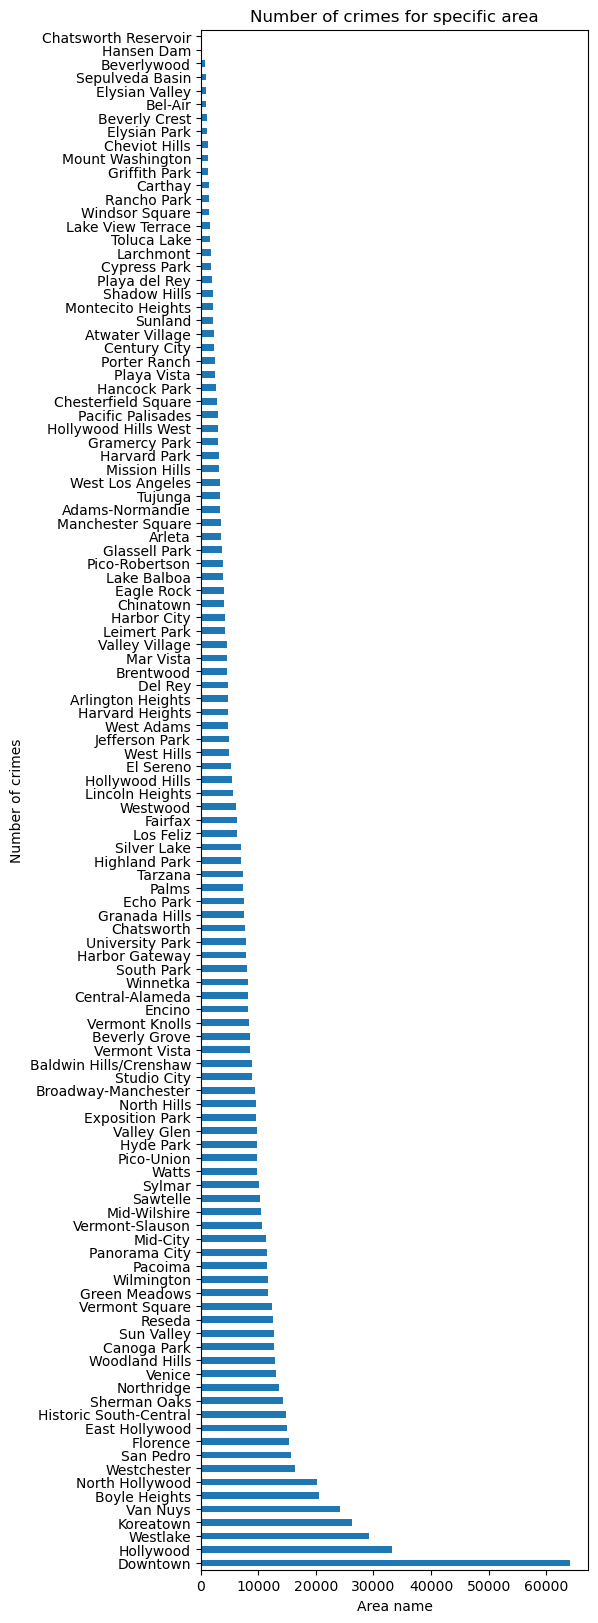

In [14]:
crimes_per_nbh = data_neighborhood["neighborhood"].value_counts()
crimes_per_nbh.plot(kind="barh", figsize=(5, 20))
plt.title("Number of crimes for specific area")
plt.xlabel("Area name")
plt.ylabel("Number of crimes")
plt.show()

In [16]:
merged_data = pd.merge(crimes_per_nbh, population, on='neighborhood', how='inner').rename(columns={'count': 'crimes'})
merged_data.head(5)

,neighborhood,crimes,region,number of people in prison,census population,total population,inprisonment rate per 100000,Unnamed: 6
0,Downtown,64104,Central L.A.,262,66555,66196,396,NaN
1,Hollywood,33248,Central L.A.,238,73475,73705,323,NaN
2,Westlake,29185,Central L.A.,430,106288,106566,404,NaN
3,Koreatown,26235,Central L.A.,349,104558,104907,333,NaN
4,Van Nuys,24179,San Fernando Valley,392,109290,109682,357,NaN


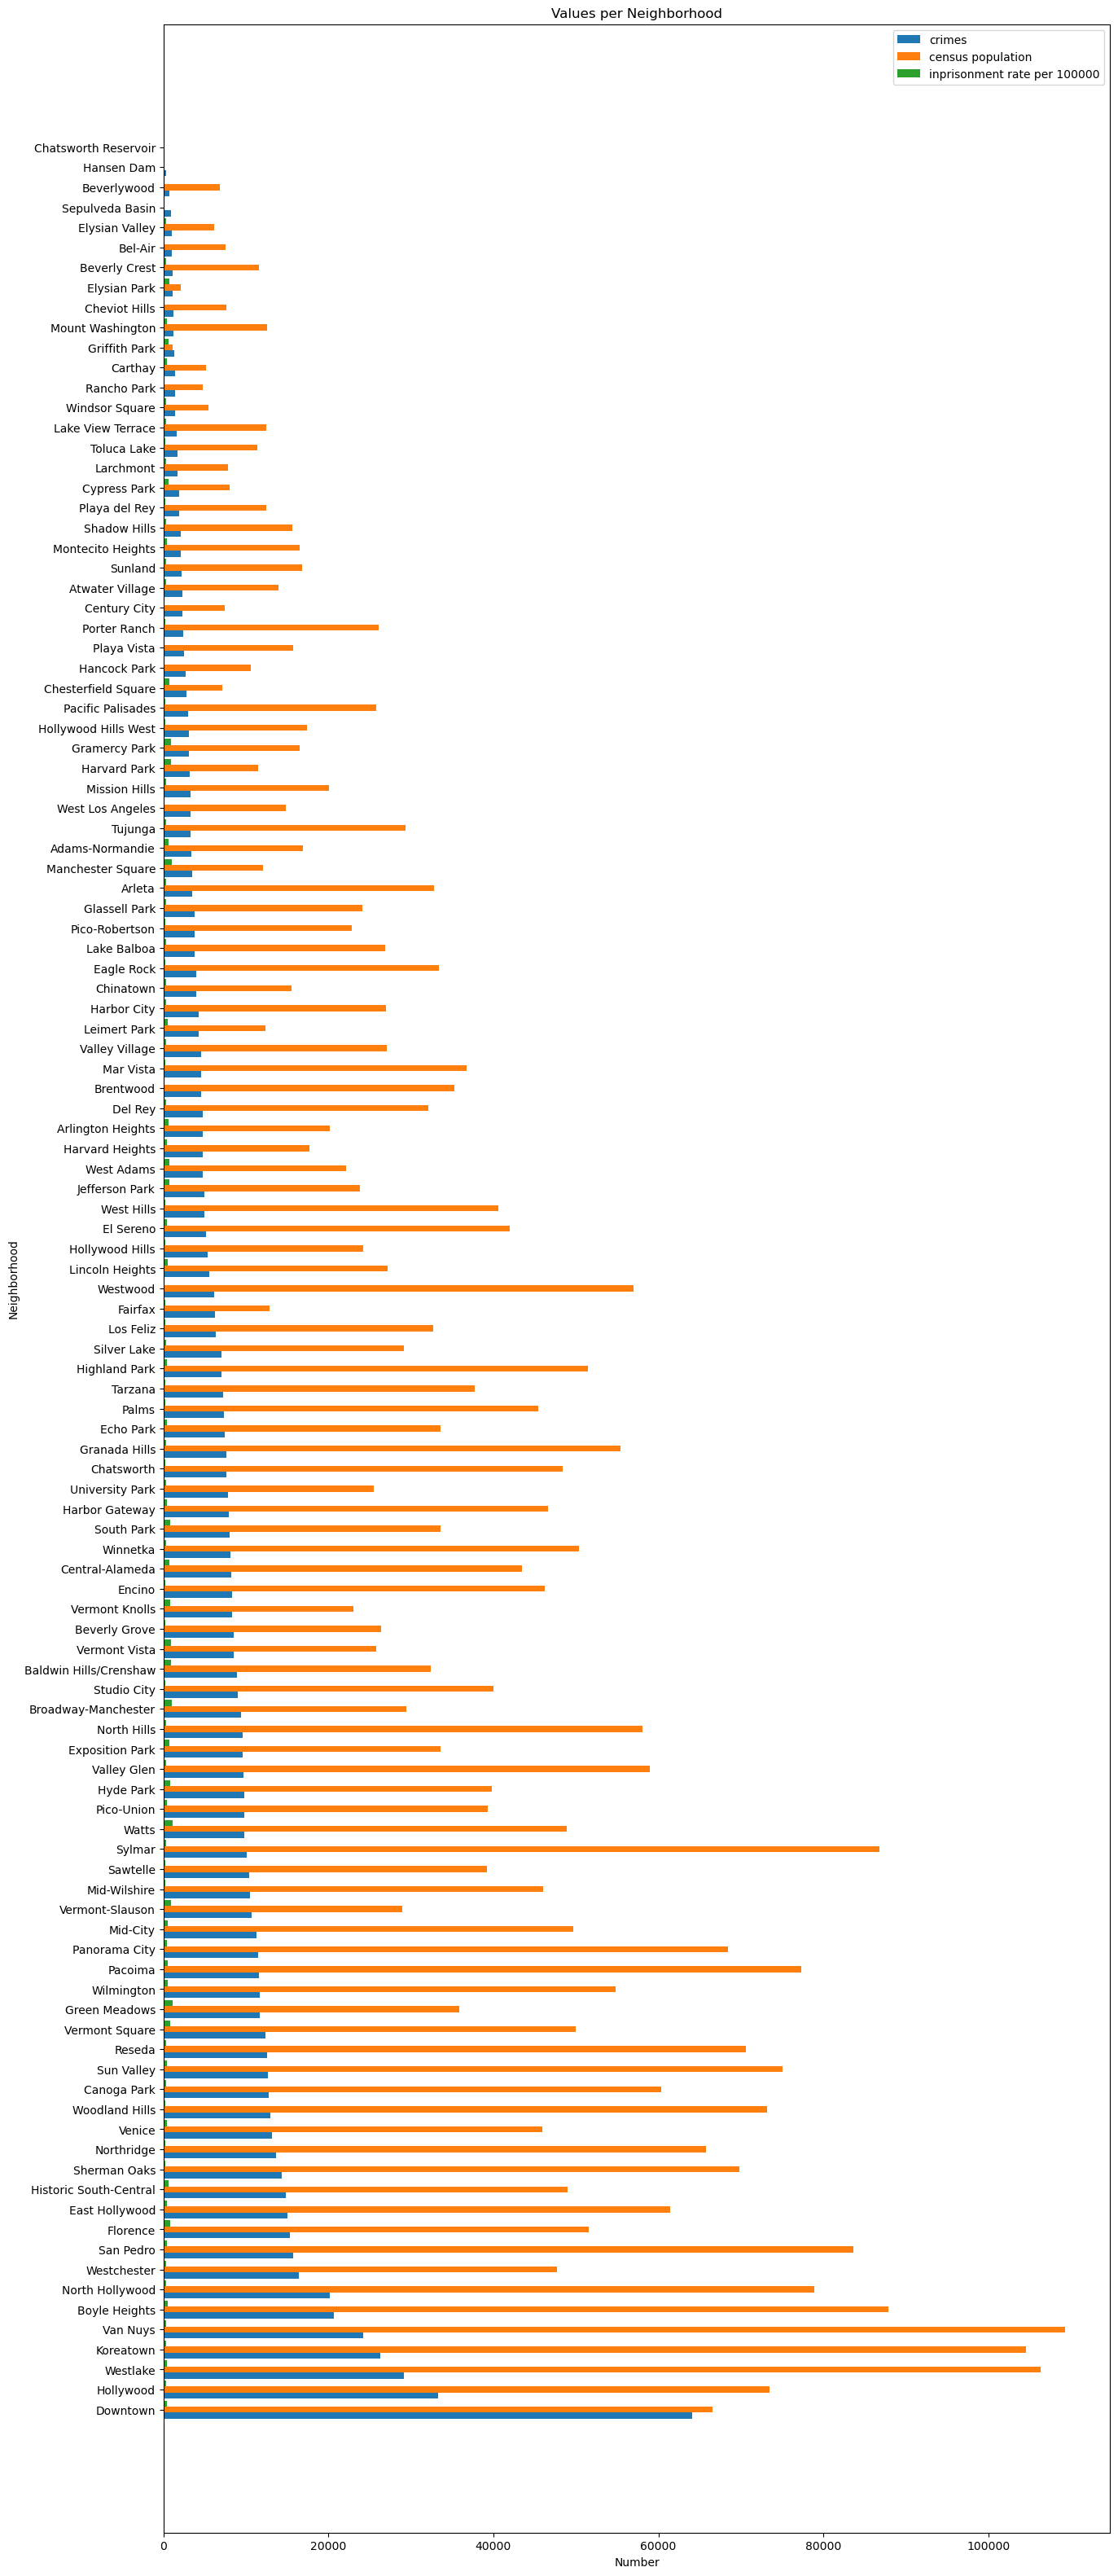

In [27]:
fig, ax = plt.subplots(figsize=(15, 40))

# Number of neighborhoods
n_neighborhoods = len(merged_data['neighborhood'])

# Set bar width and positions
bar_width = 0.3
y_positions = np.arange(n_neighborhoods)

# Plot each value
ax.barh(y_positions - bar_width, merged_data['crimes'], height=bar_width, label='crimes')
ax.barh(y_positions, merged_data['census population'], height=bar_width, label='census population')
ax.barh(y_positions + bar_width, merged_data['inprisonment rate per 100000'], height=bar_width, label='inprisonment rate per 100000')

# Set y-ticks to neighborhood names
ax.set_yticks(y_positions)
ax.set_yticklabels(merged_data['neighborhood'])

# Add labels and title
ax.set_xlabel('Number')
ax.set_ylabel('Neighborhood')
ax.set_title('Values per Neighborhood')
ax.legend()

# Show plot
plt.show()

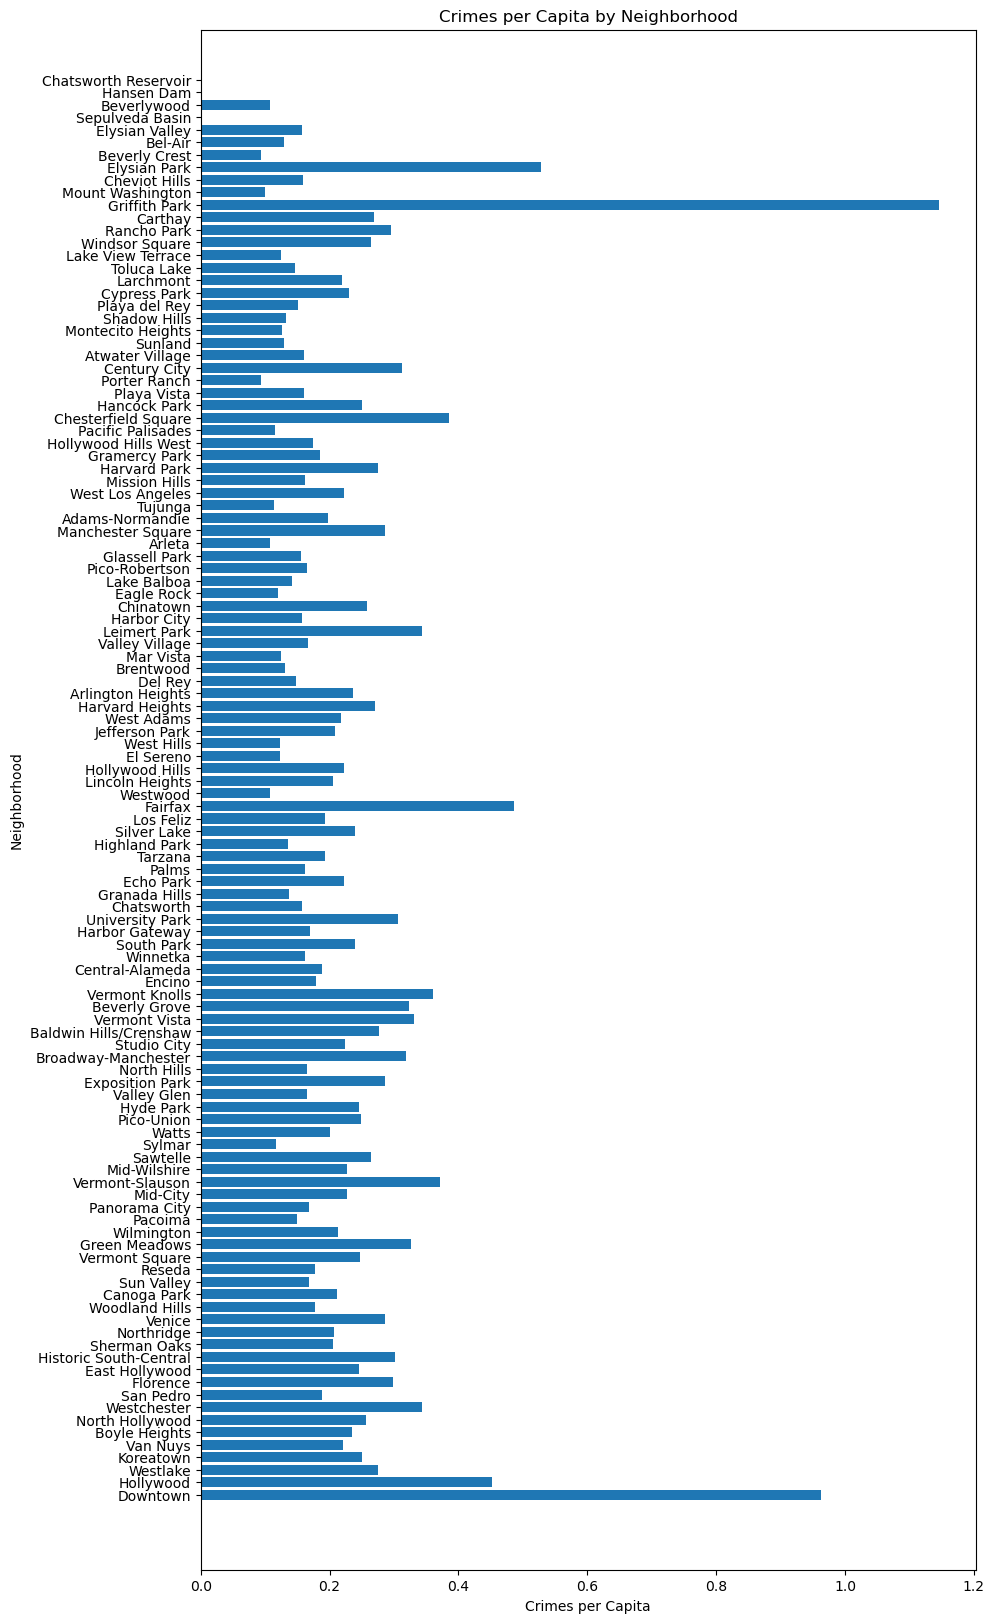

In [24]:
merged_data['crimes_per_capita'] = merged_data['crimes'] / merged_data['census population']

# Plotting
fig, ax = plt.subplots(figsize=(10, 20))

# Create horizontal bar plot
ax.barh(merged_data['neighborhood'], merged_data['crimes_per_capita'])

# Add labels and title
ax.set_xlabel('Crimes per Capita')
ax.set_ylabel('Neighborhood')
ax.set_title('Crimes per Capita by Neighborhood')

# Show plot
plt.show()